In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_dir = '../data'

In [2]:
df = pd.read_csv(data_dir + '/pd_speech_features.csv')
display(df)
print(df.shape)
y = df['class']

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


(756, 755)


In [3]:
features = list(df.columns)
features.remove('id')
features.remove('class')

In [4]:
pearson = df.corr(method='pearson')['class']
print(pearson)
print(type(pearson))

id                          -0.111661
gender                       0.182713
PPE                         -0.072939
DFA                          0.306070
RPDE                         0.247444
                               ...   
tqwt_kurtosisValue_dec_33    0.119808
tqwt_kurtosisValue_dec_34    0.192345
tqwt_kurtosisValue_dec_35    0.219454
tqwt_kurtosisValue_dec_36    0.279827
class                        1.000000
Name: class, Length: 755, dtype: float64
<class 'pandas.core.series.Series'>


In [8]:
# corr_cutoff = 0.01
# corr_cutoff = 0.3
corr_cutoff = 0.003
omit_these_features = pearson[abs(pearson) <= corr_cutoff].index
omit_these_features = list(omit_these_features)
# omit_these_features.remove('id')
print(omit_these_features, '\n')
print(len(omit_these_features), len(omit_these_features)/(df.shape[1] - 2))

['mean_7th_delta', 'mean_7th_delta_delta', 'mean_8th_delta_delta', 'det_entropy_shannon_9_coef', 'det_TKEO_mean_9_coef', 'det_TKEO_std_6_coef', 'Ed2_4_coef', 'det_LT_entropy_shannon_8_coef', 'det_LT_TKEO_mean_1_coef', 'det_LT_TKEO_std_2_coef', 'det_LT_TKEO_std_8_coef', 'tqwt_energy_dec_19', 'tqwt_energy_dec_23', 'tqwt_energy_dec_30', 'tqwt_meanValue_dec_32', 'tqwt_skewnessValue_dec_5'] 

16 0.021248339973439574


I will remove features which have a "very low" correlation with the class. A weak correlation is generally considered to be less than 0.3, but if I set corr_cutoff to 0.3 I lose 704 of the 753 features. So, through some trial and error, I set an appropriate corr_cutoff.

In [9]:
remaining_features = features.copy()
for ff in omit_these_features:
#     print(ff)
    remaining_features.remove(ff)
print(len(remaining_features))

737


In [10]:
# reduce and SAVE the df

df = df[['id'] + remaining_features + ['class']]
display(df)
df.to_csv(data_dir + '/pd_speech_features_reduced.csv', index=None)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


I will now check the spearman correlation coefficient, which captures a sense of non-linear correlations, and then compare them to the pearson correlation coefficients.

In [11]:
spearman = df.corr(method='spearman')['class']
print(spearman)
print(type(spearman))

id                          -0.111661
gender                       0.182713
PPE                         -0.126365
DFA                          0.300818
RPDE                         0.235616
                               ...   
tqwt_kurtosisValue_dec_33    0.131712
tqwt_kurtosisValue_dec_34    0.237802
tqwt_kurtosisValue_dec_35    0.252416
tqwt_kurtosisValue_dec_36    0.281066
class                        1.000000
Name: class, Length: 739, dtype: float64
<class 'pandas.core.series.Series'>


In [16]:
high_corr_features = [ff for ff in remaining_features if abs(pearson[ff]) >= 0.3]
print(high_corr_features)
print(len(high_corr_features))

['DFA', 'mean_MFCC_2nd_coef', 'std_6th_delta', 'std_7th_delta', 'std_8th_delta', 'std_9th_delta', 'std_10th_delta', 'std_11th_delta', 'std_delta_delta_log_energy', 'std_6th_delta_delta', 'std_7th_delta_delta', 'std_8th_delta_delta', 'std_9th_delta_delta', 'std_10th_delta_delta', 'std_11th_delta_delta', 'std_12th_delta_delta', 'tqwt_energy_dec_12', 'tqwt_energy_dec_13', 'tqwt_energy_dec_15', 'tqwt_entropy_shannon_dec_11', 'tqwt_entropy_shannon_dec_12', 'tqwt_entropy_shannon_dec_13', 'tqwt_entropy_shannon_dec_14', 'tqwt_entropy_shannon_dec_15', 'tqwt_entropy_shannon_dec_16', 'tqwt_entropy_shannon_dec_17', 'tqwt_entropy_log_dec_11', 'tqwt_entropy_log_dec_12', 'tqwt_entropy_log_dec_13', 'tqwt_entropy_log_dec_15', 'tqwt_entropy_log_dec_16', 'tqwt_TKEO_std_dec_11', 'tqwt_TKEO_std_dec_12', 'tqwt_stdValue_dec_10', 'tqwt_stdValue_dec_11', 'tqwt_stdValue_dec_12', 'tqwt_stdValue_dec_13', 'tqwt_stdValue_dec_14', 'tqwt_stdValue_dec_15', 'tqwt_stdValue_dec_16', 'tqwt_minValue_dec_11', 'tqwt_minValue

In [17]:
print("feature,    pearson,    spearman")
print("--------------------------------")
for ff in high_corr_features:
    print(f"{ff},    {pearson[ff]},    {spearman[ff]}")

feature,    pearson,    spearman
--------------------------------
DFA,    0.3060703713978527,    0.3008175650224533
mean_MFCC_2nd_coef,    0.39869532383637335,    0.367279101214638
std_6th_delta,    0.3231263403119249,    0.33088747422727455
std_7th_delta,    0.31982467016747,    0.3472417763435256
std_8th_delta,    0.3428754568881086,    0.3507577081140214
std_9th_delta,    0.3353955333035888,    0.3549629140791642
std_10th_delta,    0.3111600026884656,    0.32325686911825646
std_11th_delta,    0.3110077619771459,    0.3178820143280152
std_delta_delta_log_energy,    0.31868724939818777,    0.42026177006558796
std_6th_delta_delta,    0.3490458149141272,    0.3599757528602335
std_7th_delta_delta,    0.3542390686754891,    0.3799156108945492
std_8th_delta_delta,    0.3642562993989767,    0.3763648414416717
std_9th_delta_delta,    0.3643329784187203,    0.3850676698313248
std_10th_delta_delta,    0.3354082288382899,    0.34836273102770243
std_11th_delta_delta,    0.33535797371134013,    0

We see that the following features have a non-linear correlation with the class:
std_delta_delta_log_energy, tqwt_entropy_shannon_dec_12, tqwt_entropy_log_dec_13, tqwt_kurtosisValue_dec_26, tqwt_kurtosisValue_dec_27.

And the following features are very linearily related to the class:
tqwt_entropy_shannon_dec_16, tqwt_entropy_shannon_dec_17, tqwt_stdValue_dec_12, **tqwt_minValue_dec_14**, tqwt_maxValue_dec_14.

============================= I will now perform a PCA to check things out =============================

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [19]:
class RunPCA():
    def __init__(self, X: np.ndarray, y: pd.Series) -> None:
        self.X = X
        self.y = y
    
    def scale_X(self) -> None:
        sc = StandardScaler()
        self.X = sc.fit_transform(self.X)
    
    def exec_PCA(self) -> None:
        self.pca = PCA()
        self.X = self.pca.fit_transform(self.X)
    
    def set_ev(self) -> None:
        self.explained_variance = self.pca.explained_variance_ratio_
        self.num_components = len(self.explained_variance)
        print(f"number of components = {self.num_components}")
#         print(f"explained_variance = {self.explained_variance}")
        
        sum_cev = 0
        self.cummulative_ev = []
        for ii in range(self.num_components):
            sum_cev += self.explained_variance[ii]
            self.cummulative_ev.append(sum_cev)
#         print(f"cummulative_ev = {self.cummulative_ev}")
    
    def plot_ev(self) -> None:
        plt.figure()
        plt.bar(range(1, self.num_components+1), self.explained_variance)
        plt.title('explained variance')
        plt.xlabel('component')
        plt.ylabel('percent explained')
        plt.show()
        plt.close()
    
    def plot_cev(self) -> None:
        plt.figure()
        plt.bar(range(1, self.num_components+1), self.cummulative_ev)
        plt.title('cummulative explained variance')
        plt.xlabel('component')
        plt.ylabel('percent explained')
        plt.show()
        plt.close()
    
    def plot_PCA(self) -> None:        
        plt.figure()
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y)
        plt.title('PC1 vs PC2')
        plt.xlabel(f"PC1 = {100*self.explained_variance[0]:.2f}%")
        plt.ylabel(f"PC2 = {100*self.explained_variance[1]:.2f}%")
        plt.colorbar()
        plt.show()
        plt.close()
        
        plt.figure()
        plt.scatter(self.X[:, 1], self.X[:, 2], c=self.y)
        plt.title('PC2 vs PC3')
        plt.xlabel(f"PC1 = {100*self.explained_variance[1]:.2f}%")
        plt.ylabel(f"PC2 = {100*self.explained_variance[2]:.2f}%")
        plt.colorbar()
        plt.show()
        plt.close()
    
    def run(self) -> None:
        self.scale_X()
        self.exec_PCA()
        self.set_ev()
        self.plot_ev()
        self.plot_cev()
        self.plot_PCA()

number of components = 737


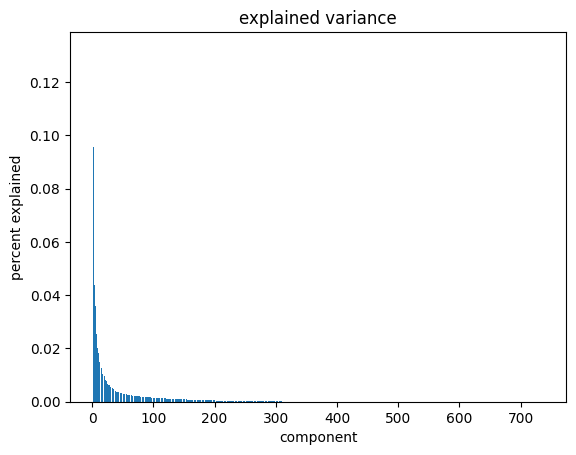

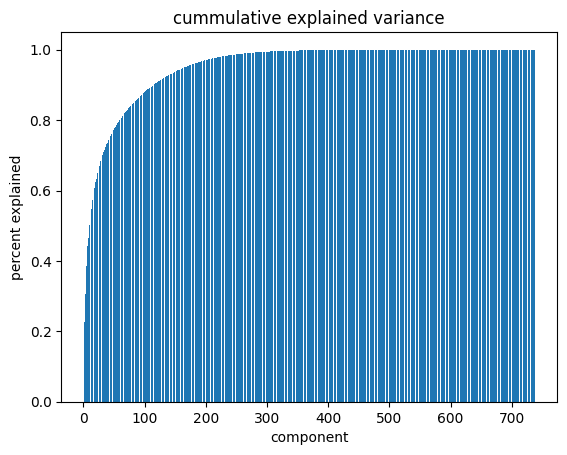

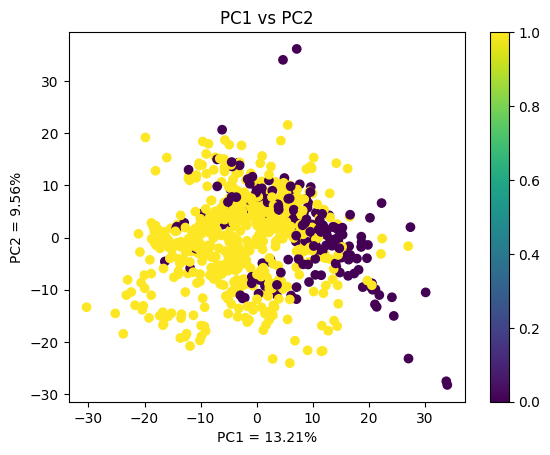

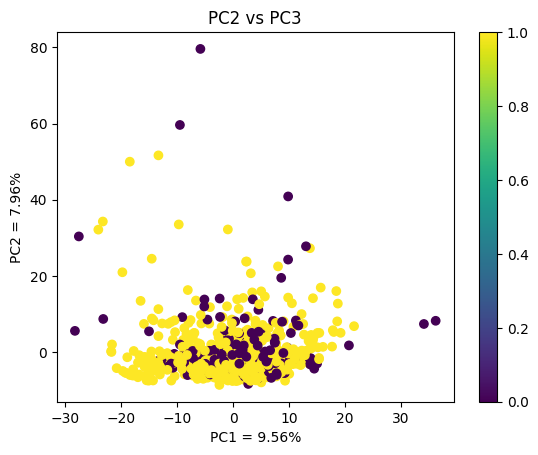

In [20]:
X = df[remaining_features].values
rpca = RunPCA(X, y)
rpca.run()

In PC1 vs PC2 we can see a separation of the classes, which is hopeful!

============================= I will now run a UMAP embedding on the PCA =============================

In [21]:
import umap

/Users/charlie/virtualenvs/vpaud/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/charlie/virtualenvs/vpaud/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/charlie/virtualenvs/vpaud/lib/python3.9/site-packages/umap/distances.

In [22]:
reducer = umap.UMAP(n_components=2, random_state=42)
embeddings = reducer.fit_transform(X)

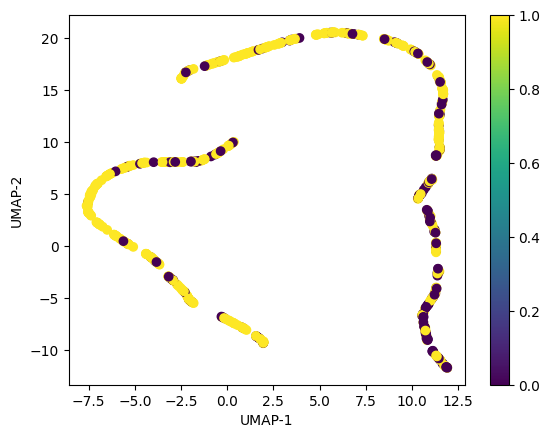

In [23]:
plt.figure()
plt.scatter(embeddings[:, 0],embeddings[:, 1], c=y)
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.colorbar()
plt.show()
plt.close()

In [ ]:
# F- I-- N---